In [2]:
import pandas as pd
import re

# Load your Excel file
df = pd.read_excel("/content/fyp translated.xlsx")

# Extended cleaning function
def extended_clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r'\bmcm\b', 'like', text)  # Replace "mcm" as a word with "like"
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply to the translated text column
df["final_cleaned_text"] = df["translated_text"].apply(extended_clean_text)

# Save to new file
df.to_excel("final_cleaned_with_like.xlsx", index=False)

# Preview the cleaned column
print(df[["translated_text", "final_cleaned_text"]].head())


                                     translated_text  \
0  I'm stressed out with all the assignment revis...   
1  This stressful hectic week man can buy this to...   
2  A little bit to be honest why it's been uniak ...   
3  Assalamualaikum and Salam Blue Color We are un...   
4  This person near UUM has no haircut for girl f...   

                                  final_cleaned_text  
0  im stressed out with all the assignment revisi...  
1  this stressful hectic week man can buy this to...  
2  a little bit to be honest why its been uniak b...  
3  assalamualaikum and salam blue color we are un...  
4  this person near uum has no haircut for girl f...  


In [3]:
import pandas as pd
import re

# Load your translated Excel file
df = pd.read_excel("/content/fyp translated.xlsx")

# Function to clean the text
def final_clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply the function to the 'translated_text' column
df["final_cleaned_text"] = df["translated_text"].apply(final_clean_text)

# Save to new Excel file (optional)
df.to_excel("final_cleaned_translated_text.xlsx", index=False)

# Preview cleaned data
print(df[["translated_text", "final_cleaned_text"]].head())


                                     translated_text  \
0  I'm stressed out with all the assignment revis...   
1  This stressful hectic week man can buy this to...   
2  A little bit to be honest why it's been uniak ...   
3  Assalamualaikum and Salam Blue Color We are un...   
4  This person near UUM has no haircut for girl f...   

                                  final_cleaned_text  
0  im stressed out with all the assignment revisi...  
1  this stressful hectic week man can buy this to...  
2  a little bit to be honest why its been uniak b...  
3  assalamualaikum and salam blue color we are un...  
4  this person near uum has no haircut for girl f...  


In [4]:


# Step 2: Import libraries
from transformers import pipeline
import pandas as pd

# Step 3: Load your cleaned text
df = pd.read_excel("/content/final_cleaned_translated_text.xlsx")  # Make sure this file is in your folder
df["final_cleaned_text"] = df["final_cleaned_text"].fillna("")

# Step 4: Load pre-trained BERT sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Step 5: Apply sentiment analysis with truncation
results = []
for text in df["final_cleaned_text"].tolist():
    try:
        result = sentiment_pipeline(text, truncation=True)
        results.append(result[0])
    except Exception as e:
        results.append({"label": "ERROR", "score": 0.0})
        print(f"Error processing text: {text[:30]}... | Error: {e}")


# Step 6: Extract results
df["sentiment_label"] = [r['label'] for r in results]
df["sentiment_score"] = [r['score'] for r in results]

# Step 7: Save result
df.to_excel("bert_sentiment_output.xlsx", index=False)

# Preview
print(df[["final_cleaned_text", "sentiment_label", "sentiment_score"]].head())


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


                                  final_cleaned_text sentiment_label  \
0  im stressed out with all the assignment revisi...          1 star   
1  this stressful hectic week man can buy this to...         5 stars   
2  a little bit to be honest why its been uniak b...         3 stars   
3  assalamualaikum and salam blue color we are un...          1 star   
4  this person near uum has no haircut for girl f...          1 star   

   sentiment_score  
0         0.553569  
1         0.539227  
2         0.357079  
3         0.270719  
4         0.469971  


In [5]:


# Step 2: Import libraries
from transformers import pipeline
import pandas as pd

# Step 3: Load your cleaned text
df = pd.read_excel("/content/final_cleaned_translated_text.xlsx")  # Ensure this file is in your working directory
df["final_cleaned_text"] = df["final_cleaned_text"].fillna("")

# Step 4: Load pre-trained BERT sentiment pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Step 5: Apply sentiment analysis with truncation
results = []
for text in df["final_cleaned_text"].tolist():
    try:
        result = sentiment_pipeline(text, truncation=True)
        results.append(result[0])
    except Exception as e:
        results.append({"label": "ERROR", "score": 0.0})
        print(f"Error processing text: {text[:30]}... | Error: {e}")

# Step 6: Extract results
df["sentiment_label"] = [r['label'] for r in results]
df["sentiment_score"] = [r['score'] for r in results]

# Step 7: Save result
df.to_excel("bert_sentiment_output.xlsx", index=False)

# Step 8: Preview
print(df[["final_cleaned_text", "sentiment_label", "sentiment_score"]].head())


Device set to use cpu


                                  final_cleaned_text sentiment_label  \
0  im stressed out with all the assignment revisi...          1 star   
1  this stressful hectic week man can buy this to...         5 stars   
2  a little bit to be honest why its been uniak b...         3 stars   
3  assalamualaikum and salam blue color we are un...          1 star   
4  this person near uum has no haircut for girl f...          1 star   

   sentiment_score  
0         0.553569  
1         0.539227  
2         0.357079  
3         0.270719  
4         0.469971  


In [6]:
sentiment_counts = df["sentiment_label"].value_counts().sort_index()
print(sentiment_counts)


sentiment_label
1 star     672
2 stars    333
3 stars    303
4 stars     98
5 stars    151
Name: count, dtype: int64


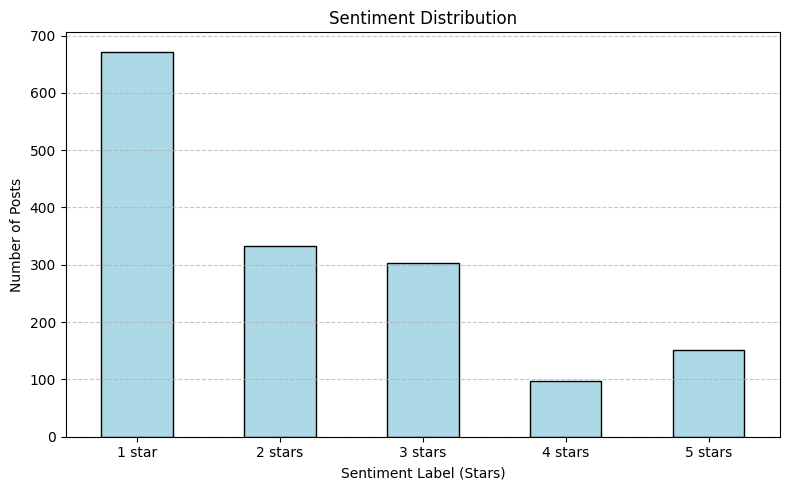

In [10]:
import matplotlib.pyplot as plt

sentiment_counts = df["sentiment_label"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label (Stars)")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
def classify_sentiment(star):
    if star in ["4 stars", "5 stars"]:
        return "Positive"
    elif star == "3 stars":
        return "Neutral"
    else:
        return "Negative"

df["sentiment_class"] = df["sentiment_label"].apply(classify_sentiment)
print(df[["sentiment_label", "sentiment_class"]].head())


  sentiment_label sentiment_class
0          1 star        Negative
1         5 stars        Positive
2         3 stars         Neutral
3          1 star        Negative
4          1 star        Negative


In [12]:

import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-13-423699119>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues_d")


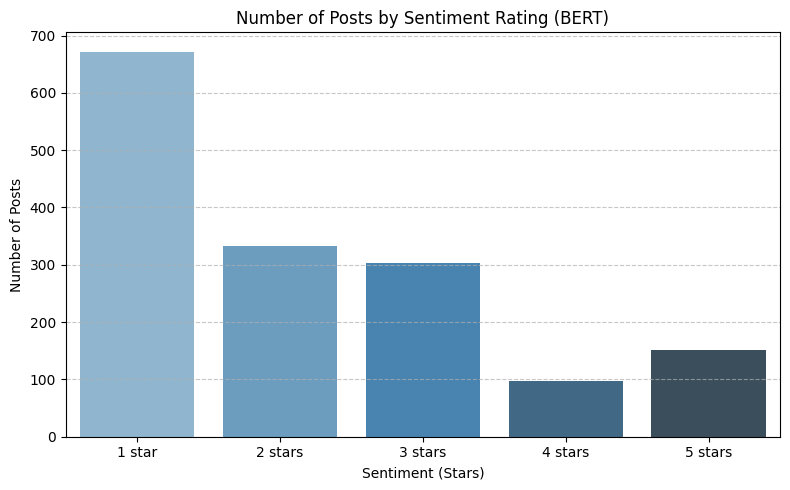

In [13]:
sentiment_counts = df["sentiment_label"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues_d")
plt.title("Number of Posts by Sentiment Rating (BERT)")
plt.xlabel("Sentiment (Stars)")
plt.ylabel("Number of Posts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


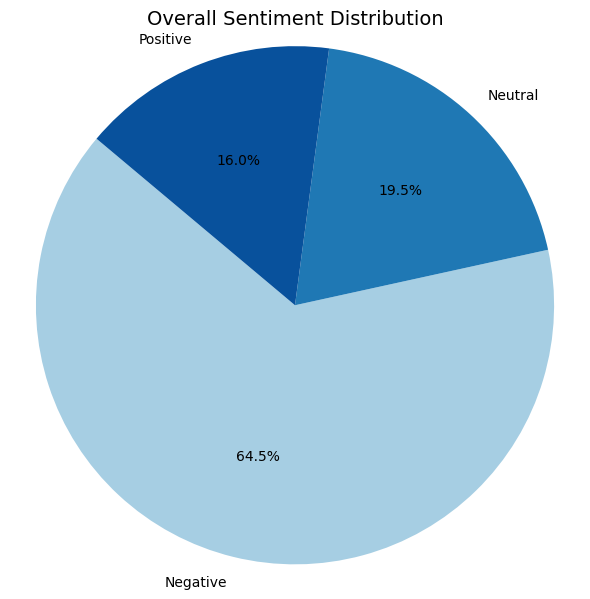

In [15]:
def classify_sentiment(star):
    if star in ["4 stars", "5 stars"]:
        return "Positive"
    elif star == "3 stars":
        return "Neutral"
    else:
        return "Negative"

df["sentiment_class"] = df["sentiment_label"].apply(classify_sentiment)
sentiment_pie = df["sentiment_class"].value_counts()

# Blue color shades
blue_colors = ['#a6cee3', '#1f78b4', '#08519c']  # light blue, medium blue, dark blue

plt.figure(figsize=(6, 6))
plt.pie(sentiment_pie, labels=sentiment_pie.index, autopct='%1.1f%%', colors=blue_colors, startangle=140)
plt.title("Overall Sentiment Distribution", fontsize=14)
plt.axis('equal')  # Make pie chart circular
plt.tight_layout()
plt.show()



<ipython-input-16-2282554563>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sentiment_label", y="sentiment_score", data=df, palette="Blues_d")


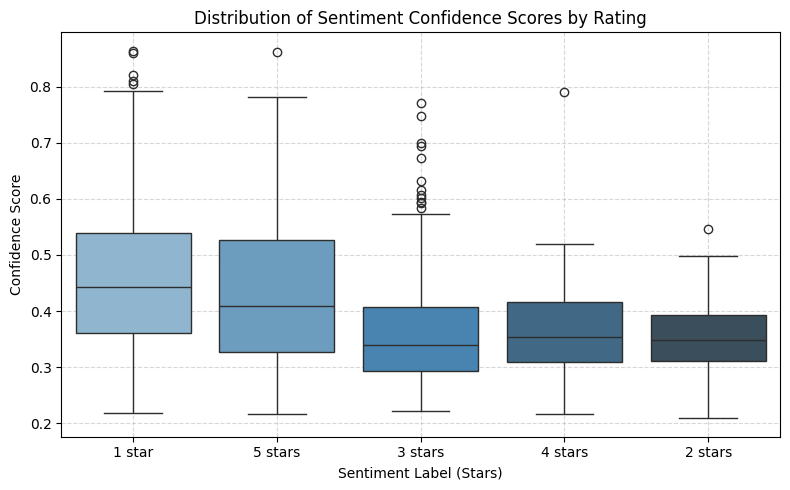

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="sentiment_label", y="sentiment_score", data=df, palette="Blues_d")
plt.title("Distribution of Sentiment Confidence Scores by Rating")
plt.xlabel("Sentiment Label (Stars)")
plt.ylabel("Confidence Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


<ipython-input-17-3997639781>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_class", palette="Blues_d", order=["Positive", "Neutral", "Negative"])


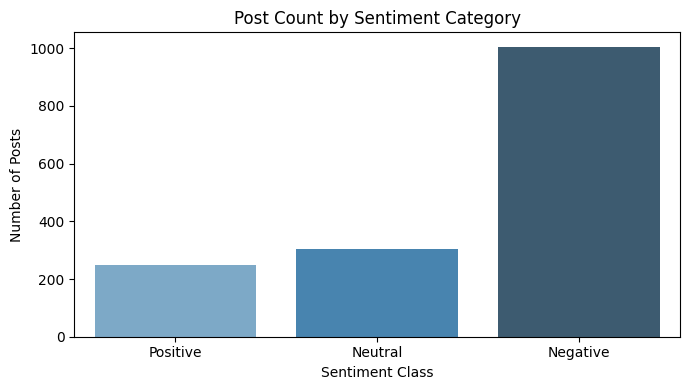

In [17]:
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x="sentiment_class", palette="Blues_d", order=["Positive", "Neutral", "Negative"])
plt.title("Post Count by Sentiment Category")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


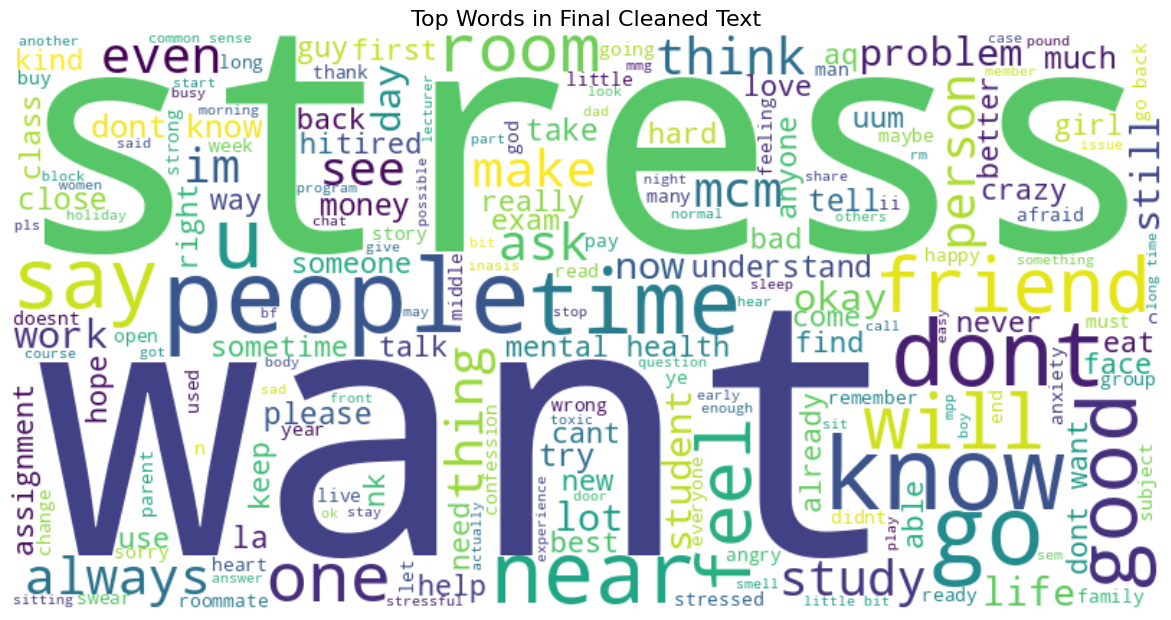

In [18]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all cleaned text into one string
text_data = " ".join(df["final_cleaned_text"].dropna().astype(str))

# Create and display the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',  # You can also try: 'plasma', 'cool', 'Set2'
    max_words=200
).generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Top Words in Final Cleaned Text", fontsize=16)
plt.tight_layout(pad=0)
plt.show()


In [19]:
def classify_sentiment(star):
    if star in ["4 stars", "5 stars"]:
        return "Positive"
    elif star == "3 stars":
        return "Neutral"
    else:
        return "Negative"

df["sentiment_class"] = df["sentiment_label"].apply(classify_sentiment)


In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [21]:
def generate_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    stopwords.update(["saya", "dan", "nak", "je", "la", "dah", "kau", "ni", "tu", "ya", "tak", "dengan"])

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        stopwords=stopwords,
        max_words=200
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()


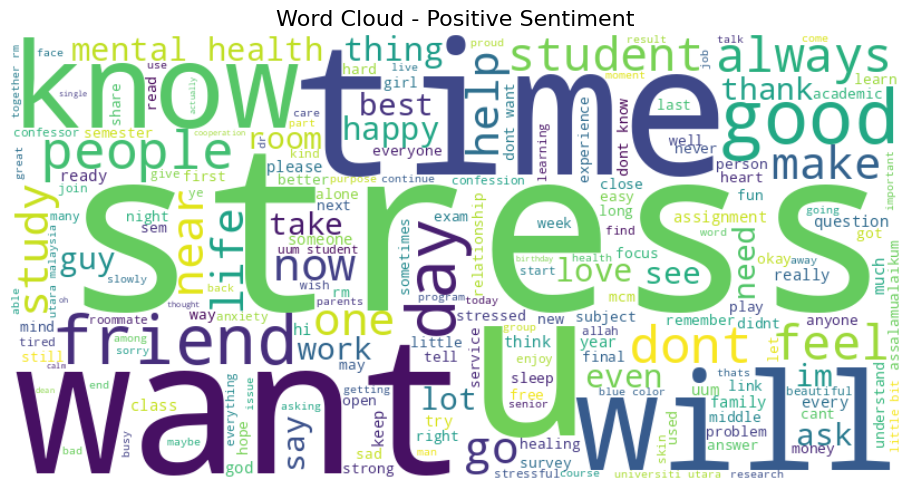

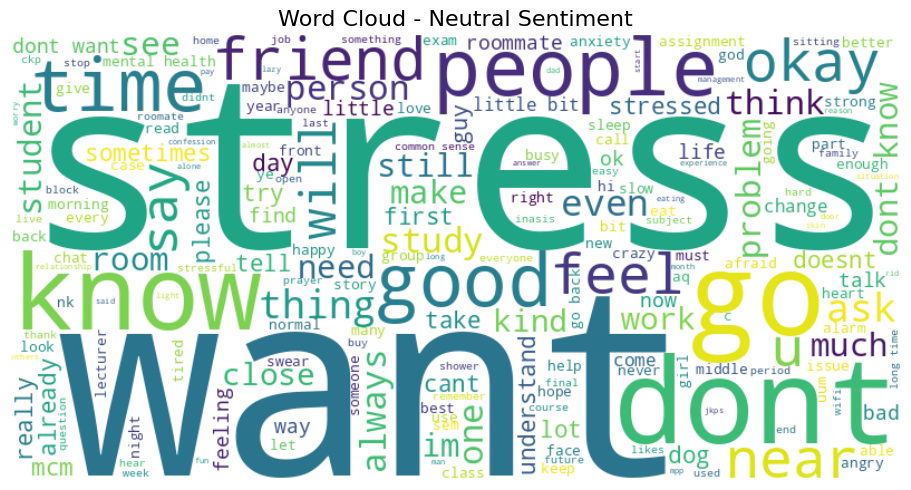

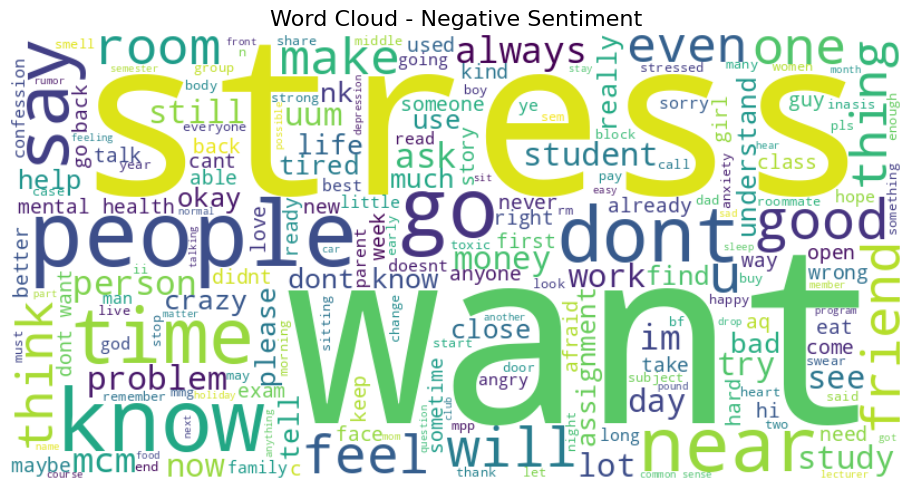

In [22]:
# POSITIVE
positive_text = " ".join(df[df["sentiment_class"] == "Positive"]["final_cleaned_text"].dropna().astype(str))
generate_wordcloud(positive_text, "Word Cloud - Positive Sentiment")

# NEUTRAL
neutral_text = " ".join(df[df["sentiment_class"] == "Neutral"]["final_cleaned_text"].dropna().astype(str))
generate_wordcloud(neutral_text, "Word Cloud - Neutral Sentiment")

# NEGATIVE
negative_text = " ".join(df[df["sentiment_class"] == "Negative"]["final_cleaned_text"].dropna().astype(str))
generate_wordcloud(negative_text, "Word Cloud - Negative Sentiment")


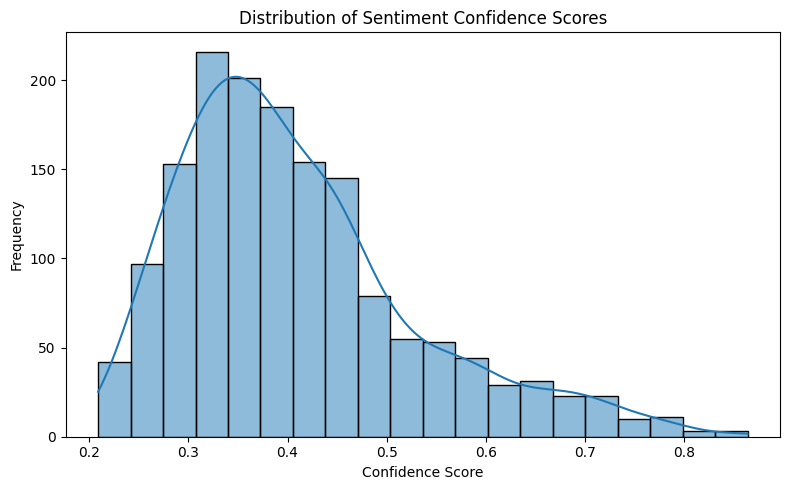

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment_score'], bins=20, kde=True, color="#1f78b4")
plt.title("Distribution of Sentiment Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



<ipython-input-24-3139148720>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


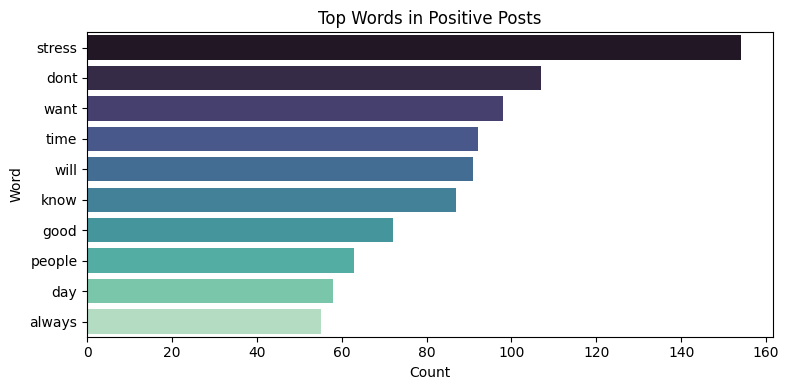

<ipython-input-24-3139148720>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


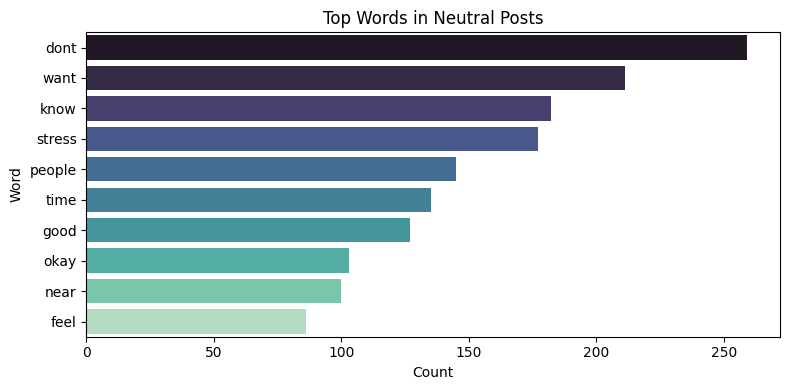

<ipython-input-24-3139148720>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


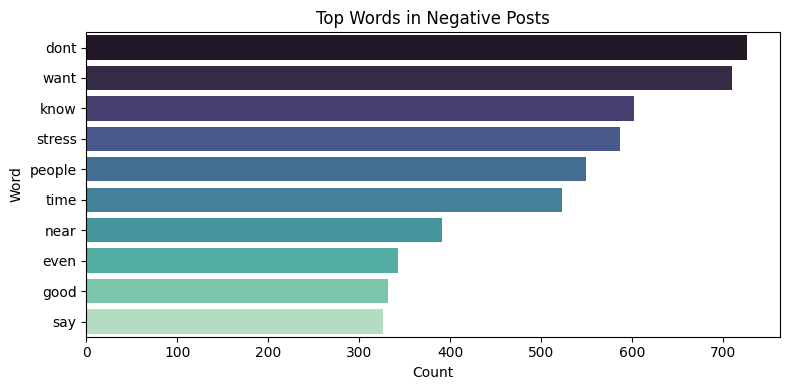

In [24]:
from collections import Counter
import re

def get_top_words(text_series, n=10):
    all_words = " ".join(text_series).lower()
    words = re.findall(r'\b\w+\b', all_words)
    words = [w for w in words if w not in STOPWORDS and len(w) > 2]
    return Counter(words).most_common(n)

for sentiment in ["Positive", "Neutral", "Negative"]:
    top_words = get_top_words(df[df['sentiment_class'] == sentiment]["final_cleaned_text"])
    words, counts = zip(*top_words)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette="mako")
    plt.title(f"Top Words in {sentiment} Posts")
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()


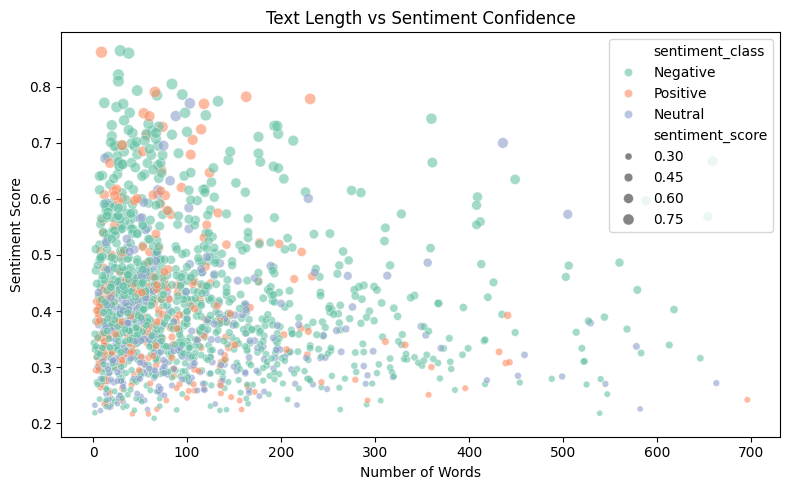

In [30]:
df["text_length"] = df["final_cleaned_text"].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.scatterplot(x="text_length", y="sentiment_score", hue="sentiment_class", size="sentiment_score", data=df, palette="Set2", alpha=0.6)
plt.title("Text Length vs Sentiment Confidence")
plt.xlabel("Number of Words")
plt.ylabel("Sentiment Score")
plt.legend()
plt.tight_layout()
plt.show()



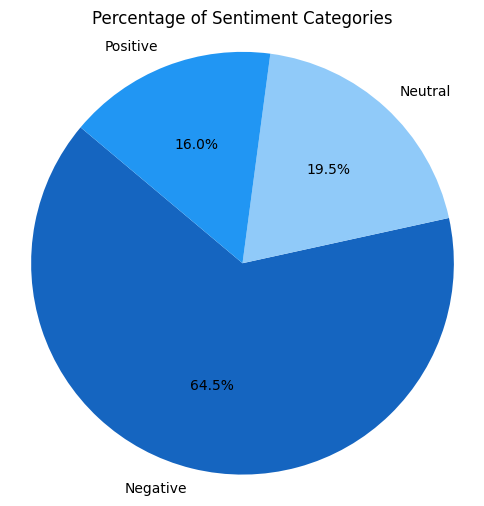

In [36]:
sent_percent = df["sentiment_class"].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(sent_percent, labels=sent_percent.index, autopct='%1.1f%%', colors=['#1565c0', '#90caf9', '#2196f3'], startangle=140)
plt.title("Percentage of Sentiment Categories")
plt.axis("equal")
plt.show()


In [39]:
import plotly.express as px

fig = px.histogram(
    df,
    x="sentiment_label",
    color="sentiment_class",  # Optional: adds color grouping
    title="Interactive Sentiment Histogram",
    color_discrete_sequence=['#64b5f6', '#2196f3', '#0d47a1']  # Custom blue colors
)

fig.show()



In [40]:
pip install streamlit wordcloud matplotlib seaborn pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


2025-06-01 16:55:40.441 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-01 16:55:40.465 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-06-01 16:55:40.479 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 16:55:42.207 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-01 16:55:42.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 16:55:42.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 16:55:42.743 Thread 'Thread-10': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-01 16:55:42.748 Thread 'Thread-10': missing 

DeltaGenerator()

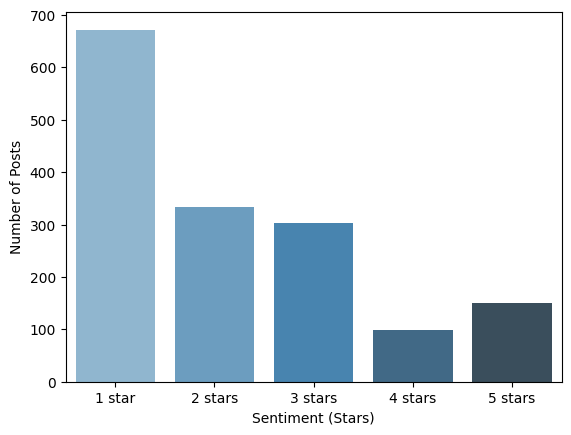

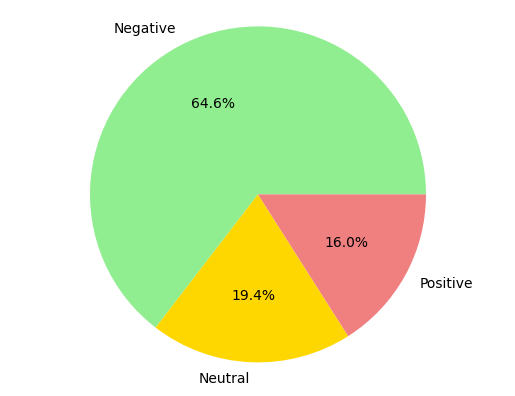

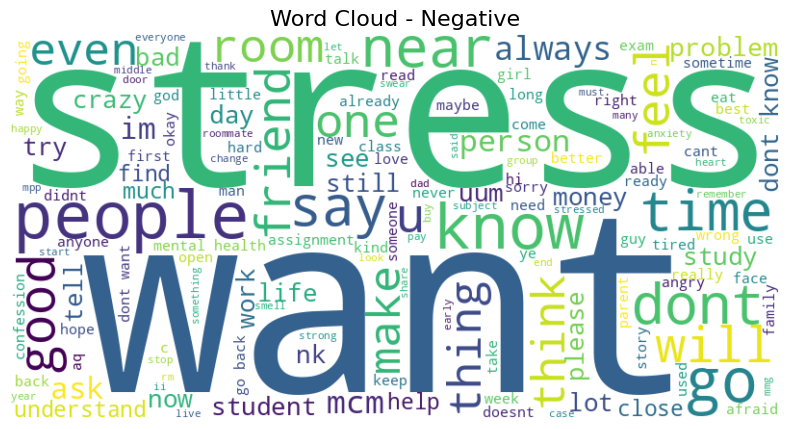

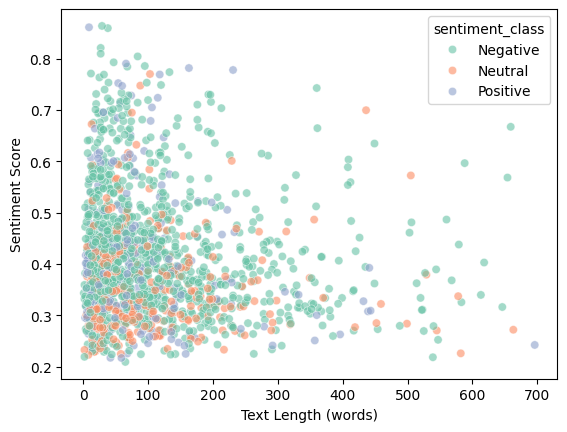

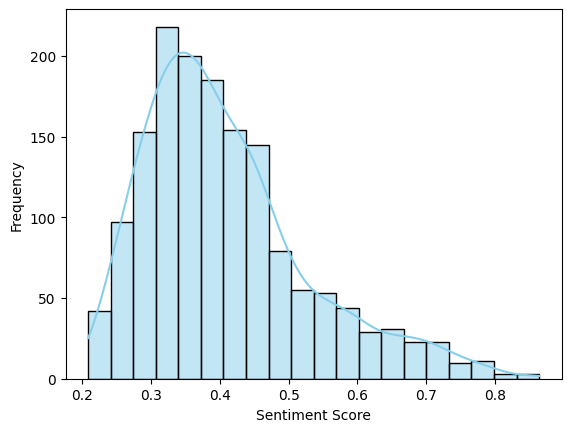

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Load your data
@st.cache_data
def load_data():
    df = pd.read_excel("bert_sentiment_output.xlsx")
    # Make sure sentiment_class column exists
    def classify_sentiment(star):
        if star in ["4 stars", "5 stars"]:
            return "Positive"
        elif star == "3 stars":
            return "Neutral"
        else:
            return "Negative"
    df["sentiment_class"] = df["sentiment_label"].apply(classify_sentiment)
    df["text_length"] = df["final_cleaned_text"].apply(lambda x: len(str(x).split()))
    return df

df = load_data()

st.title("Sentiment Analysis Dashboard (BERT)")

# Bar Chart - Sentiment Counts
st.header("Number of Posts by Sentiment")
sentiment_counts = df["sentiment_label"].value_counts().sort_index()
fig1, ax1 = plt.subplots()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Blues_d", ax=ax1)
ax1.set_xlabel("Sentiment (Stars)")
ax1.set_ylabel("Number of Posts")
st.pyplot(fig1)

# Pie Chart - Sentiment Class Distribution
st.header("Sentiment Class Distribution")
sentiment_class_counts = df["sentiment_class"].value_counts()
fig2, ax2 = plt.subplots()
ax2.pie(sentiment_class_counts, labels=sentiment_class_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'gold', 'lightcoral'])
ax2.axis('equal')
st.pyplot(fig2)

# Word Cloud by Sentiment Class
st.header("Word Clouds by Sentiment Class")
stopwords = set(STOPWORDS)
stopwords.update(["saya", "dan", "nak", "je", "la", "dah", "kau", "ni", "tu", "ya", "tak", "dengan"])

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=stopwords, max_words=150).generate(text)
    fig, ax = plt.subplots(figsize=(10,5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=16)
    st.pyplot(fig)

sentiment_option = st.selectbox("Choose Sentiment Class for Word Cloud", df["sentiment_class"].unique())
filtered_text = " ".join(df[df["sentiment_class"] == sentiment_option]["final_cleaned_text"].dropna().astype(str))
plot_wordcloud(filtered_text, f"Word Cloud - {sentiment_option}")

# Scatter Plot: Text Length vs Sentiment Score
st.header("Text Length vs Sentiment Confidence Score")
fig3, ax3 = plt.subplots()
sns.scatterplot(x="text_length", y="sentiment_score", hue="sentiment_class", data=df, palette="Set2", alpha=0.6, ax=ax3)
ax3.set_xlabel("Text Length (words)")
ax3.set_ylabel("Sentiment Score")
st.pyplot(fig3)

# Histogram - Sentiment Score Distribution
st.header("Distribution of Sentiment Confidence Scores")
fig4, ax4 = plt.subplots()
sns.histplot(df["sentiment_score"], bins=20, kde=True, color="skyblue", ax=ax4)
ax4.set_xlabel("Sentiment Score")
ax4.set_ylabel("Frequency")
st.pyplot(fig4)


In [ ]:
streamlit run dashboard.py


SyntaxError: invalid syntax (<ipython-input-33-5bd035b99858>, line 1)